PRÁCTICA 1 (Colab) - "IA en 10 líneas"(baseline completo).

El objetivo principal de esta práctica es construir un pipeline mínimo de ML. Cargando datos, dividir, entrenar, predecir, evaluar y interpretar el lenguaje de negocio.

In [2]:
#Paso 2:imports
import sys
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [3]:
#Paso 3:cargamos los datos.
data = load_iris()
X, y = data.data, data.target

print("Filas, cloumnas:", X.shape)
print("Clases:", np.unique(y))
print("Nombres de clases:", data.target_names)

Filas, cloumnas: (150, 4)
Clases: [0 1 2]
Nombres de clases: ['setosa' 'versicolor' 'virginica']


Podemos ver como el la base de datos esta compuesta por 150 filas y 4 columnas, lo que hace un total de 600 observaciones con las que vamos a trabajar. Nuestra base de datos en sobre flores, formada por tres tipos de flores setosa, versicolor y virginica.

In [4]:
print(data.data[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [5]:
#Paso 4:separación de datos entre train y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
                                                    stratify=y )

En este paso hemos separado nuestra base de datos en un 80% de entrenamiento y un 20% para posteriormente porbar nuestro modelo.

In [6]:
#Paso 5: entrenamiento del baseline.
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [7]:
#Paso 6: predicción y evaluación.
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred, target_names=data.target_names))

Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



INTERPRETACIÓN DEL MODELO:

Vemos como este modelo tiene una precisión total del 97%, es decir de las 30 pruebas que hace en total clasifica de forma correcta 29 y solo hace un error.

Anlizando cada clase teniendo en cuenta los baremos que nos de el modelo predictivo podemos concluir con lo siguiente.

Setosa: no ha tenido ningun problema, ya que clasifica bien todas las flores setosa y no confunde otra clase con setosa.

Versicolor:tiene una precisión perfecta, pero podemos observar que tiene un recall del 90% lo que significa que hay un 10% de flores versicolor que no las identifica en su clase.

Virginica: podemos destacar que su precisión no es perfecta siendo de un 91%, lo que significa que en un 9% identifica flores que no son virginica como si lo fuesen. Tiene un recall perfecto.

Estos fallos que hace el modelo son porque  biologicamente las flores Versicolor y Virginica se parecen mucho y se confunden en algunas ocasiones entre ellas. Por eso vemos como el clasifica perfectamente la clase de flor Setosa porque es la clase de flor mas distinta de entre las tres.

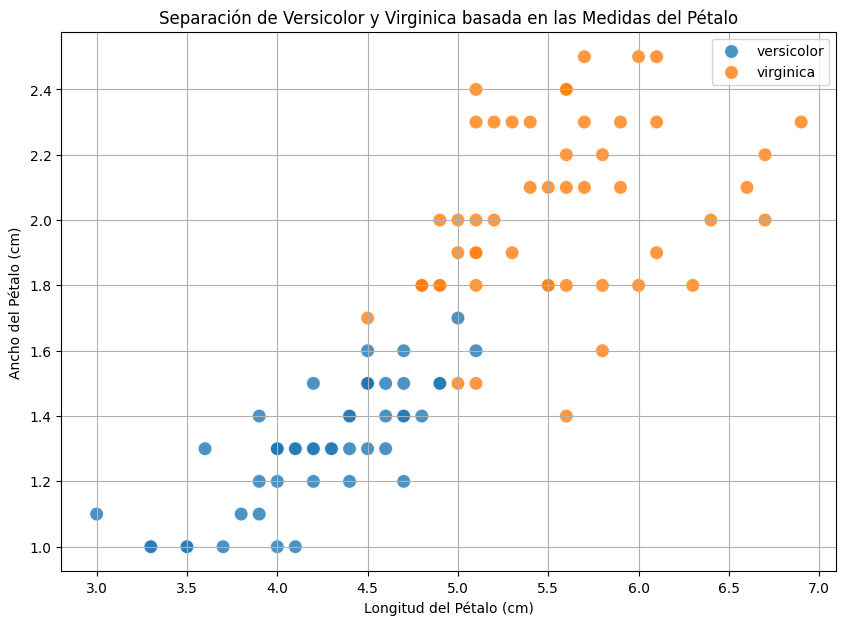

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar datos para Versicolor y Virginica
# La Clase 1 es Versicolor, la Clase 2 es Virginica
versicolor_virginica_indices = np.where((y == 1) | (y == 2))
X_vv = X[versicolor_virginica_indices]
y_vv = y[versicolor_virginica_indices]

# Ajustar los nombres de las clases para los datos filtrados
target_names_vv = [data.target_names[i] for i in np.unique(y_vv)]

# Crear un DataFrame para facilitar el trazado con seaborn
df_vv = pd.DataFrame(X_vv, columns=data.feature_names)
df_vv['species'] = np.array([data.target_names[i] for i in y_vv])

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='petal length (cm)',
    y='petal width (cm)',
    hue='species',
    data=df_vv,
    s=100,
    alpha=0.8
)
plt.title('Separación de Versicolor y Virginica basada en las Medidas del Pétalo')
plt.xlabel('Longitud del Pétalo (cm)')
plt.ylabel('Ancho del Pétalo (cm)')
plt.legend()
plt.grid(True)
plt.show()

Debido a que el modelo identifica y clasifica de manera perfecta al tipo de flor Setosa, he hecho un gráfico que representa de forma clara las diferencias entre los otros dos tipos de flores. Vemos com tanto en longitud y anchura del petalo las flores de tipo Virginica son mas grandes que las Versicolor. La separacion de estas dos clases se ve clara de forma visual aunque en algunos casos algunas flores se pueden confundir entre clases debido a sus estandares de tamaño.

Para que el modelo fuese mas preciso y no confundiese flores abria que tomar en cuenta otras variables.
